In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../resources')

In [3]:
# import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

# from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
# from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround

In [5]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

In [51]:
from single_pad_transmon_pocket import TransmonPocket_Single

design.overwrite_enabled = True

design.delete_all_components()

options = dict(pad_width = '250um',
pocket_width = '300um',
pad_pocket_distance_top = '60um',
pos_x = '0',
pad_height = '200um',
pos_y = '0',
connection_pads = dict(
    a = dict(loc_W  = 1, 
             loc_H =  1, 
             pad_gap = '10um',
             pad_height = '20um',
             pad_width = '100um',
             pad_cpw_extent =  '10um',
             pocket_rise = '0um',
             cpw_extend = '5um')))

q1 = TransmonPocket_Single(design,'Q1',options = options)

gui.rebuild()
gui.autoscale()

# design.delete_component('spiral')
# design.delete_component('spiral_cut')


# ops = {
#     'pos_x': '20um',
#     'pos_y': '-20um',
#     'n': '2',
#     'width': '15um',
#     'radius': '400um',
#     'gap': '35um',
#     'orientation': '0',
#     'subtract': 'False',
#     'n_turn':'6',
#     'radi_turns' : '40um',
#     'short':False,
#     'adjustments':'0um'}
# NSpiral(design, 'spiral', ops)
# NSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='30um')})
gui.rebuild()
gui.zoom_on_components(['Q1'])

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [52]:
stg = ShortToGround(design,'end',options = dict(pos_x = '0.5mm',pos_y = '0.5mm',orientation = '90'))

In [53]:
gui.rebuild()
gui.autoscale()
# gui.highlight_components(['end'])

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [54]:
ops=dict(fillet='40um')


In [55]:
import numpy as np
from collections import OrderedDict

def pins_for_spiral(radius,gap,n):
    spiral_list = OrderedDict()
    for step in range(n):
        point_value = radius / 2 + step * (0 + gap)
        spiral_list[step*4] = np.array([point_value, -point_value])
        spiral_list[step*4+1] = np.array([-point_value, -point_value])
        spiral_list[step*4+2] = np.array([-point_value, point_value])
        spiral_list[step*4+3] = np.array([point_value + (0 + gap), point_value])

    point_value = radius / 2 + (step + 1) * (0 + gap)
    # spiral_list[step*4+4] = np.array([-point_value, -point_value])
    return(spiral_list)

In [56]:
anchors = pins_for_spiral(0.4,0.1,2)

In [57]:
anchors

OrderedDict([(0, array([ 0.2, -0.2])),
             (1, array([-0.2, -0.2])),
             (2, array([-0.2,  0.2])),
             (3, array([0.3, 0.2])),
             (4, array([ 0.3, -0.3])),
             (5, array([-0.3, -0.3])),
             (6, array([-0.3,  0.3])),
             (7, array([0.4, 0.3]))])

In [58]:
# options = {'pin_inputs': 
#             {'start_pin': {'component': 'Q1', 'pin': 'a'}, 
#              'end_pin': {'component': 'shorta', 'pin': 'short'}},
#             'lead': {'start_straight': '20um', 'end_straight': '0um'},
#             'step_size': '0.25mm',
#             'anchors': anchors,
#             'total_length':'100mm',
#             'hfss_wire_bonds': 'True',
#             'q3d_wire_bonds':'True',
#             **ops
#            }

options = Dict(total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='20 um',
        lead = dict(start_straight='20um', end_straight = '0um'),
        anchors = anchors,
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='end', pin='short')), )

In [59]:
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
qa = RouteMixed(design, 'cpw_1', options)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [60]:
gui.rebuild()
gui.autoscale()

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



In [61]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [62]:
c1.sim.setup.min_passes  = 1
c1.sim.setup.max_passes = 5
print(c1.sim.setup)

{'name': 'Setup', 'reuse_selected_design': True, 'reuse_setup': True, 'freq_ghz': 5.0, 'save_fields': False, 'enabled': True, 'max_passes': 5, 'min_passes': 1, 'min_converged_passes': 2, 'percent_error': 0.5, 'percent_refinement': 30, 'auto_increase_solution_order': True, 'solution_order': 'High', 'solver_type': 'Iterative'}


In [69]:
c1.sim.run(components=['Q1'])#, open_terminations=[('Q1', 'a')])#, ('Q1', 'bus1'), ('Q1', 'bus2')])
c1.sim.capacitance_matrix 

c1.sim._get_results_from_renderer()
c_mat = c1.sim.capacitance_matrix

INFO 10:58PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 10:58PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:58PM [analyze]: Analyzing setup Setup
INFO 10:58PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp7tdsy2_m.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 10:58PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpccd81ukw.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 10:58PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp5pf62_14.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 10:58PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpajfnxh53.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

In [31]:
c_mat #open on the end

,a_connector_pad_Q1,g_wb,pad_top_Q1
a_connector_pad_Q1,664.98214,-642.08901,-18.99490
g_wb,-642.08901,784.65388,-77.15768
pad_top_Q1,-18.99490,-77.15768,98.09654


In [65]:
c_mat #short on the end of it

,a_connector_pad_Q1,pad_top_Q1
a_connector_pad_Q1,164.30299,-96.10640
pad_top_Q1,-96.10640,98.12318


In [68]:
c_mat #transmon, open on the reader pin

,a_connector_pad_Q1,ground_main_plane,pad_top_Q1
a_connector_pad_Q1,22.01460,-12.51211,-9.17325
ground_main_plane,-12.51211,138.33166,-84.43052
pad_top_Q1,-9.17325,-84.43052,97.53227


In [70]:
c_mat #transmon, no option to keep the pin open

,a_connector_pad_Q1,pad_top_Q1
a_connector_pad_Q1,134.52992,-92.75220
pad_top_Q1,-92.75220,96.67162


In [20]:
import numpy as np
from qiskit_metal.analyses.quantization import EPRanalysis

INFO 06:40PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:40PM [load_ansys_project]: 	Opened Ansys App
INFO 06:40PM [load_ansys_project]: 	Opened Ansys Desktop v2022.2.0
INFO 06:40PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/slab/Documents/Ansoft/
	Project:   Project5
INFO 06:40PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 06:40PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:40PM [connect]: 	Connected to project "Project5" and design "Design_q3d" 😀 

06:40PM 57s WARNING [activate_ansys_design]: The design_name=readout was not in active project.  Designs in active project are: 
['Design_q3d'].  A new design will be added to the project.  
INFO 06:40PM [connect_design]: 	Opened active design
	Design:    readout [Solution type: Eigenmode]
WARNING 06:40PM [connect_setup]: 	No design setup detected.
WARNING 06:40PM [connect_setup]: 	Creating eigenmode default setup.
INF

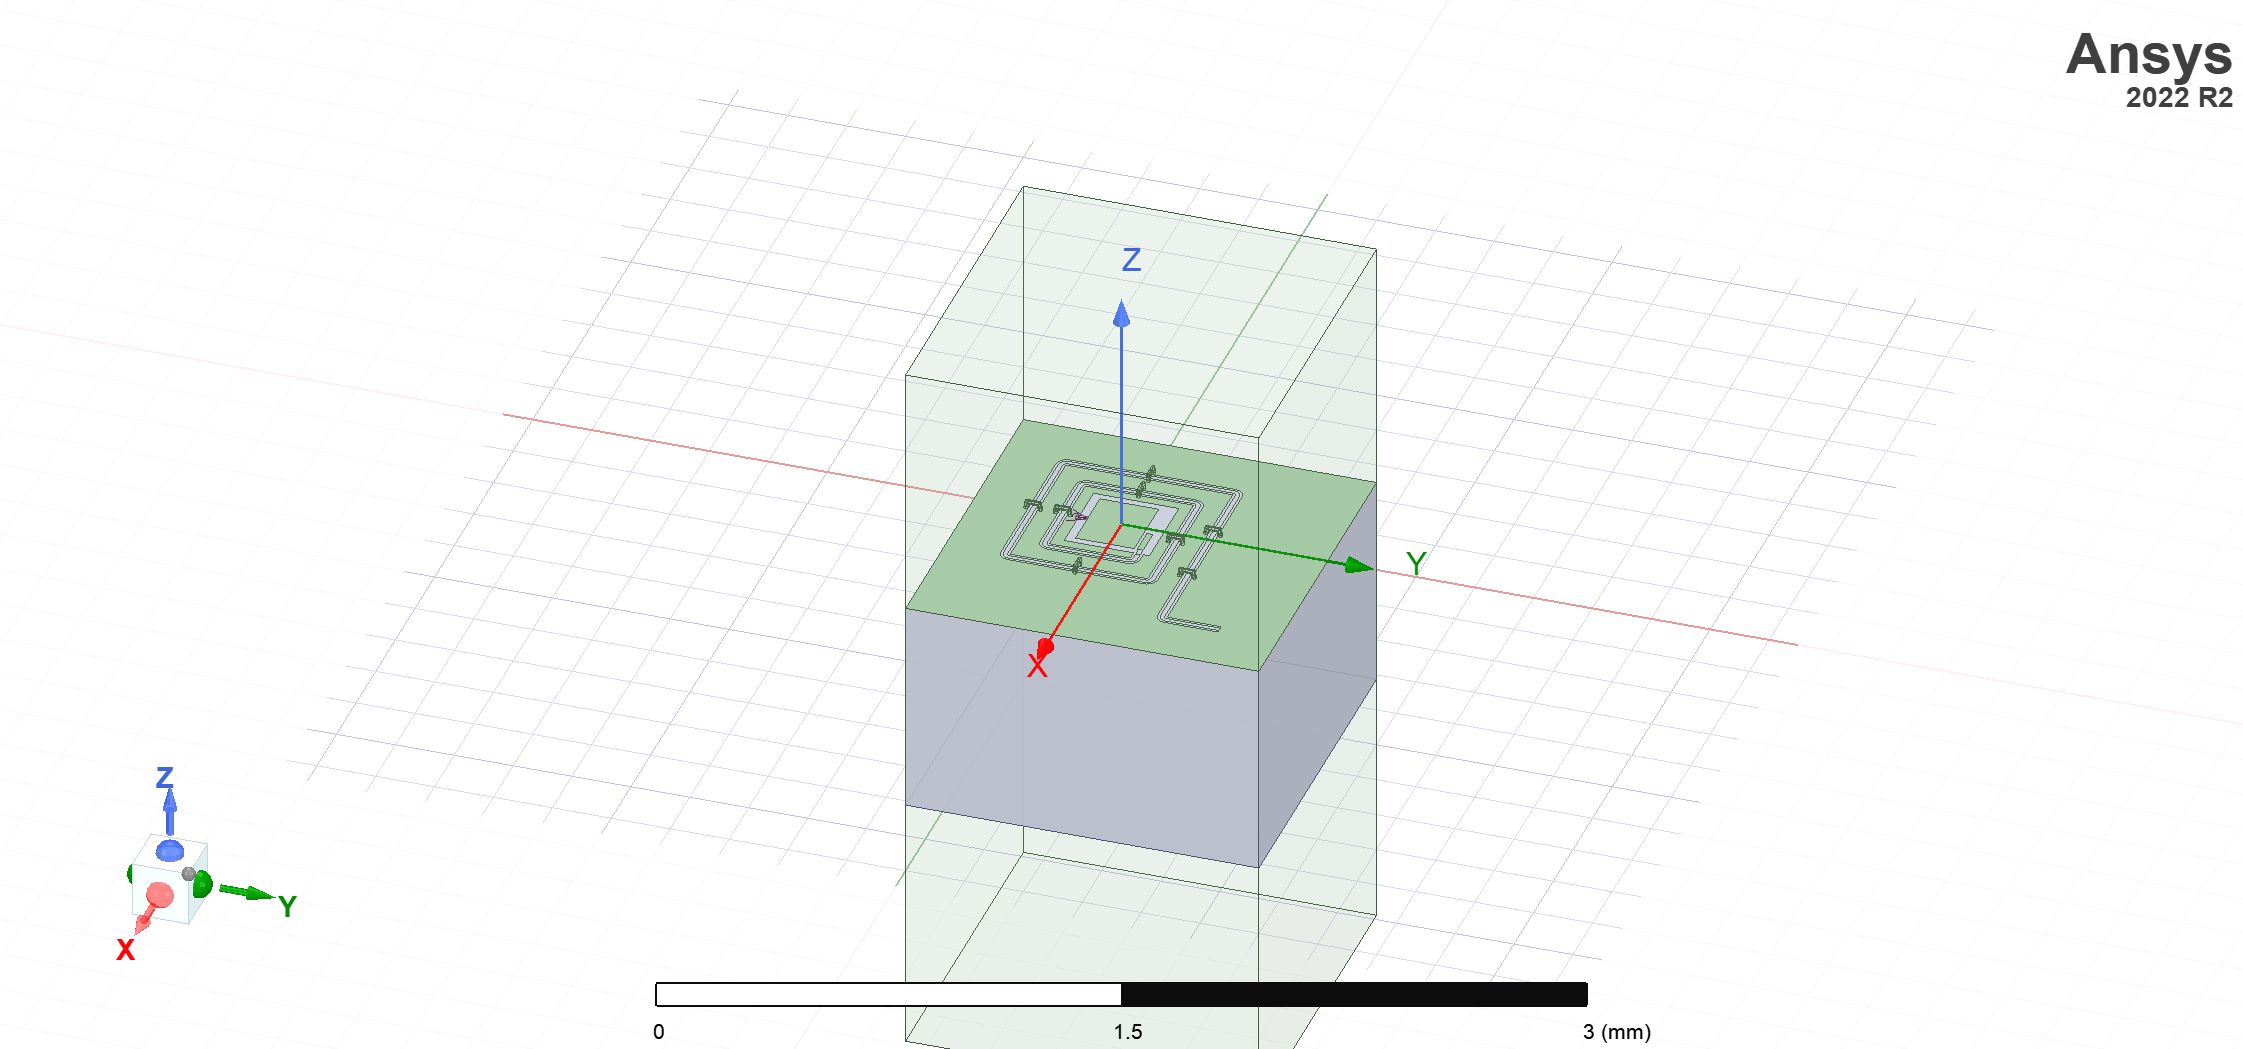

INFO 06:41PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1



In [21]:


# design.delete_component('Q1')
eig_res = EPRanalysis(design, "hfss")

hfss = eig_res.sim.renderer
hfss.start()

hfss.activate_ansys_design('readout','eigenmode')

hfss.render_design(['cpw_1','Q1','end'],[])
hfss.save_screenshot()

setup = hfss.pinfo.setup
setup.passes = 20
setup.min_converged = 9

print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

In [22]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()

06:42PM 27s INFO [get_f_convergence]: Saved convergences to c:\Users\slab\Desktop\Qiskit_metal_tutorial\tutorials\4 Analysis\A. Core - EM and quantization\hfss_eig_f_convergence.csv


06:42PM 37s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


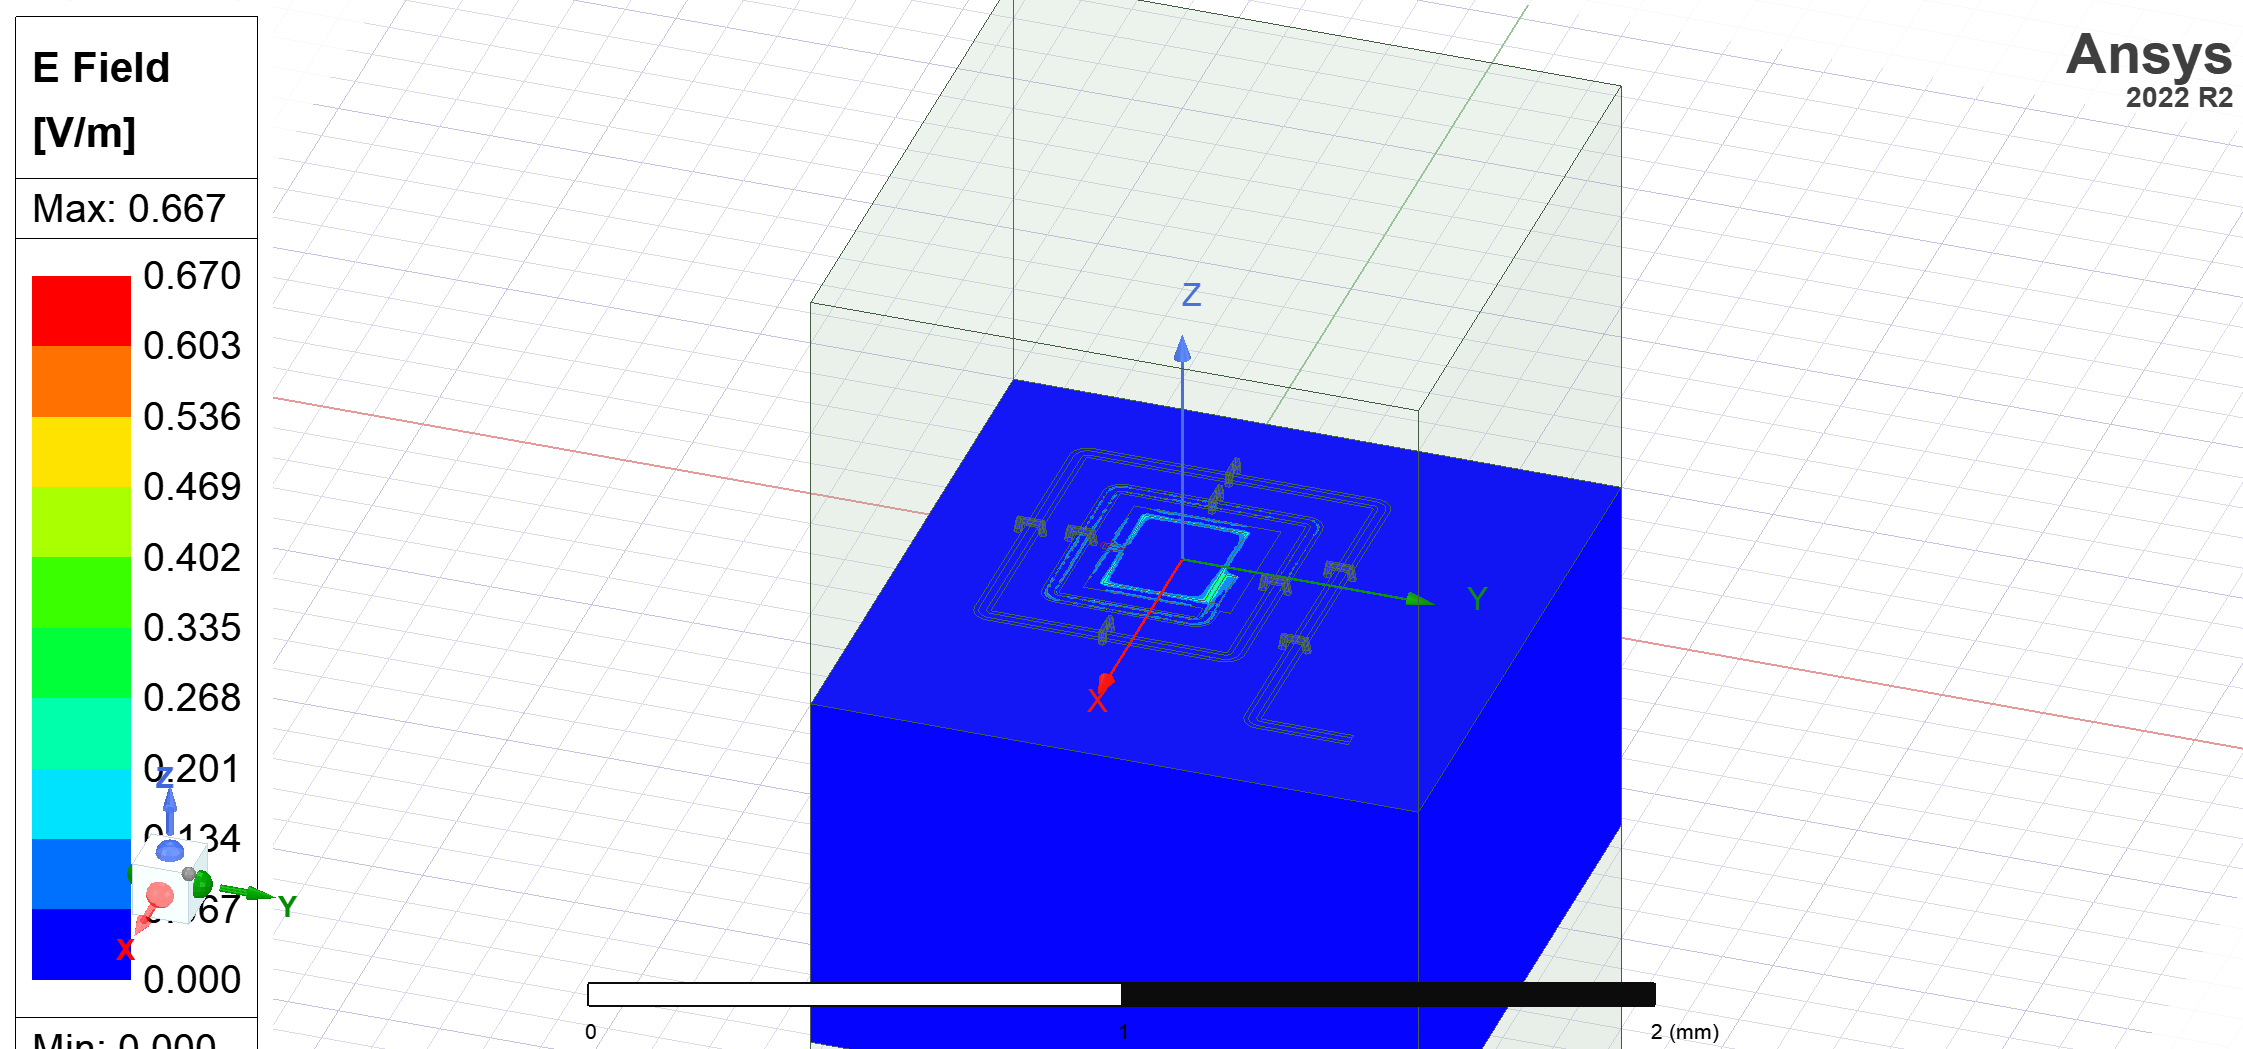

WindowsPath('c:/Users/slab/Desktop/Qiskit_metal_tutorial/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [23]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [24]:
hfss.clear_fields(['Mag_E1'])

In [25]:
hfss.set_mode(2, "Setup")

INFO 06:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
06:42PM 52s WARNING [set_mode]: The requested mode=2 is not a valid (1 to 1) selection. The mode was not set.


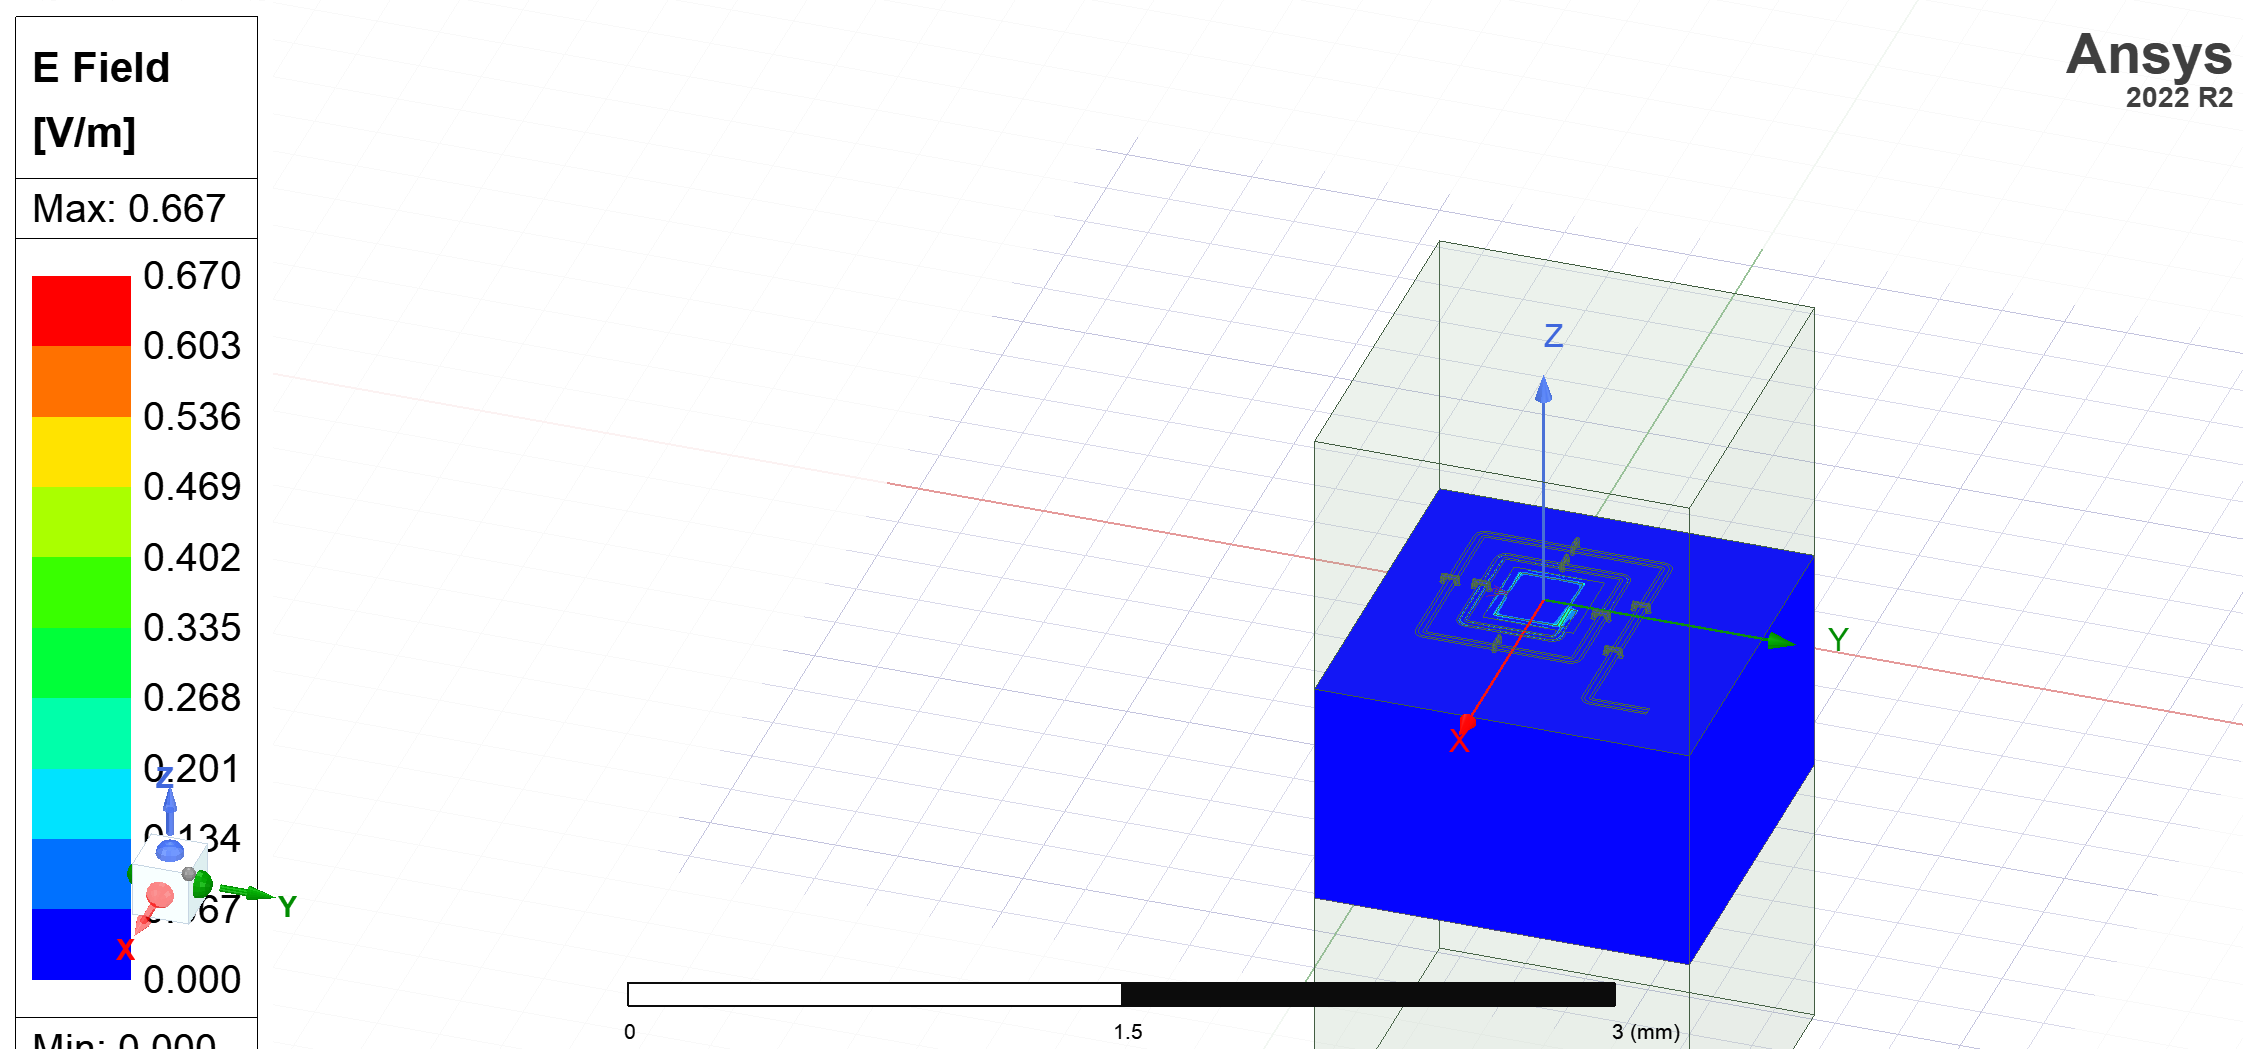

WindowsPath('c:/Users/slab/Desktop/Qiskit_metal_tutorial/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [26]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [27]:
hfss.clean_active_design()

In [130]:
q3d.clean_active_design()

In [28]:
from qiskit_metal.analyses.quantization import LOManalysis
c2 = LOManalysis(design, "q3d")

In [29]:
q3d = c2.sim.renderer

In [30]:
q3d.activate_ansys_design("TransmonResonator_q3d", 'capacitive')

06:43PM 52s WARNING [activate_ansys_design]: The design_name=TransmonResonator_q3d was not in active project.  Designs in active project are: 
['readout', 'Design_q3d'].  A new design will be added to the project.  
INFO 06:43PM [connect_design]: 	Opened active design
	Design:    TransmonResonator_q3d [Solution type: Q3D]
WARNING 06:43PM [connect_setup]: 	No design setup detected.
WARNING 06:43PM [connect_setup]: 	Creating Q3D default setup.
INFO 06:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [32]:
q3d.render_design(['cpw_1','Q1','end'], [])

In [33]:
q3d.analyze_setup("Setup")

INFO 06:44PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:44PM [analyze]: Analyzing setup Setup


In [34]:
c2.sim.capacitance_matrix, c2.sim.units = q3d.get_capacitance_matrix()
c2.sim.capacitance_all_passes, _ = q3d.get_capacitance_all_passes()
c2.sim.capacitance_matrix

INFO 06:48PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp1zyvriuv.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 06:48PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpomyazrva.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 06:48PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp9nzhzfy8.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 06:48PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp2wkqu9g7.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 06:48PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp2j6tj15_.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False
INFO 06:48PM [g

,a_connector_pad_Q1,pad_top_Q1
a_connector_pad_Q1,166.89066,-99.68476
pad_top_Q1,-99.68476,101.70477


In [134]:
c2.setup.junctions=Dict(Lj=0.25231, Cj=0)
c2.setup.freq_readout = 7.0
c2.setup.freq_bus = []

c2.run_lom()
c2.lumped_oscillator_all

ValueError: Capacitance matrix is not the right size

In [80]:
result = {}

results = {}
N = 5
length = np.linspace(-0.3,0,10)

for i,len in enumerate(length):
    hfss.clean_active_design()
    temp_design = designs.DesignPlanar()
    
    ops = {
    'pos_x': '20um',
    'pos_y': '-20um',
    'n': '2',
    'width': '15um',
    'radius': '350um',
    'gap': '30um',
    'orientation': '0',
    'subtract': 'False',
    'n_turn':'6',
    'radi_turns' : '35um',
    'short':True,
    'adjustments':len}
    NSpiral(design, 'spiral', ops)
    NSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='30um')})

    eig_res = EPRanalysis(design, "hfss")

    hfss = eig_res.sim.renderer
    hfss.start()

    hfss.activate_ansys_design('readout','eigenmode')

    hfss.render_design(['spiral','spiral_cut'],[])
    hfss.save_screenshot()

    setup = hfss.pinfo.setup
    setup.passes = 20
    setup.min_converged = 9

    # Next 2 lines are counterinuitive, since there is no junction in this resonator.
    # However, these are necessary to make pyEPR work correctly. Please do note delete
    hfss.pinfo.design.set_variable('Lj', '10 nH')
    hfss.pinfo.design.set_variable('Cj', '0 fF')

    setup.analyze()
    
    eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
    eig_res.sim.plot_convergences()
    
    result[len] = hfss.get_convergences()
    

NameError: name 'length' is not defined

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'max_delta_s': 0.1,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'sweep_setup': {'name': 'Sweep',
  'start_ghz': 2.0,
  'stop_ghz': 8.0,
  'count': 101,
  'step_ghz': None,
  'type': 'Fast',
  'save_fields': False}}

In [51]:
import numpy as np
import scipy.linalg as la
import qutip as q
import astropy.units as u
import astropy.constants as con

class Single_Transmon_Circuit:
    ## Default constant
    eq = 1.602e-19*u.C 
    epsilon = con.eps0
    h = 6.636/10**34
    hbar = con.hbar
    kb = con.k_B
    Tc = 1.2
    delta = 1.764*kb*Tc
    phi0 = con.h/2/eq
    dielectric = 9.34*epsilon
    def __init__(self,cap_mat,pad_name,CPW_name,ground_plane_name = 'ground_main_plane') -> None:
        self.c_couple = -cap_mat[pad_name][CPW_name]*u.fF
        self.c_to_ground = cap_mat[pad_name][pad_name]
        self.c_CPW = cap_mat[CPW_name][CPW_name]

In [54]:
Single_Transmon_Circuit(c_mat,'pad_top_Q1','n_spiral_spiral')